In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization,GlobalAveragePooling2D

In [3]:
#listing all the classes
import os
labels=os.listdir('garbage_classification')
print(labels)

['paper', 'green-glass', 'clothes', 'metal', 'cardboard', 'trash', 'biological', 'white-glass', 'battery', 'brown-glass', 'plastic', 'shoes']


In [7]:
#counting total number of classes in each class.
dataset_count = {}
for label in labels:
    label_path = os.path.join('garbage_classification', label)
    count = len(os.listdir(label_path))
    dataset_count[label] = count

print(dataset_count)

{'paper': 1050, 'green-glass': 629, 'clothes': 5325, 'metal': 769, 'cardboard': 891, 'trash': 697, 'biological': 985, 'white-glass': 775, 'battery': 945, 'brown-glass': 607, 'plastic': 865, 'shoes': 1977}


In [9]:
#listing all the classes
import os
labels=os.listdir('garbage_classification')
print(labels)

['paper', 'green-glass', 'clothes', 'metal', 'cardboard', 'trash', 'biological', 'white-glass', 'battery', 'brown-glass', 'plastic', 'shoes']


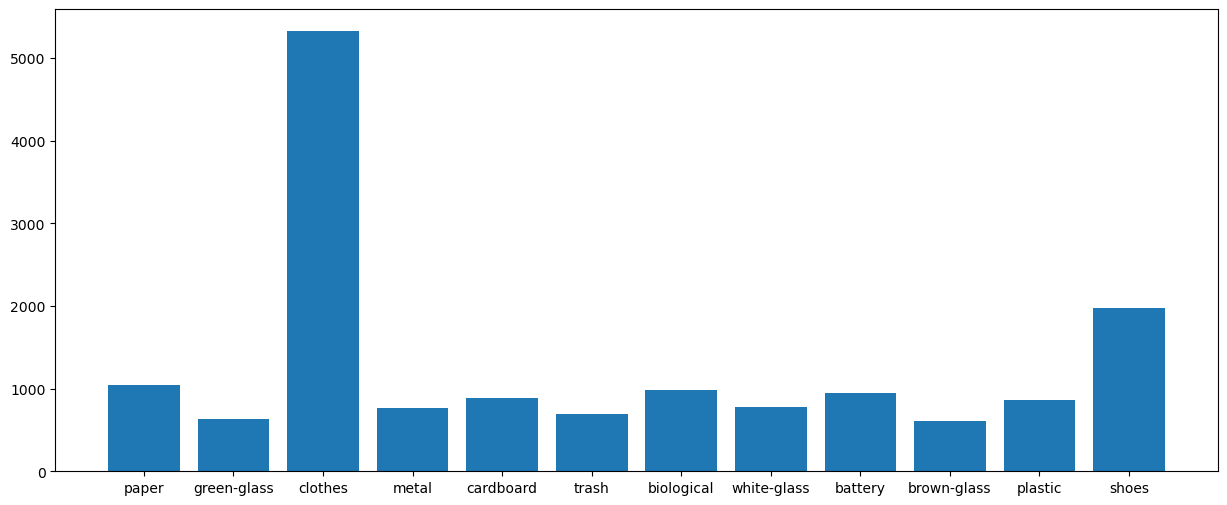

In [11]:
#representing in a graph
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.bar(labels,dataset_count.values())
plt.show()

In [13]:
import os
# making train and test directory
os.makedirs('original_dataset', exist_ok=True)
train_dir = os.path.join('original_dataset', "train")
test_dir = os.path.join('original_dataset', "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [15]:
#splittting the dataset into 80:20 ratio
import shutil
import random
for label in os.listdir('garbage_classification'):
    label_path = os.path.join('garbage_classification', label)
    if os.path.isdir(label_path):
        os.makedirs(os.path.join(train_dir, label), exist_ok=True) # creating directories of each class train
        os.makedirs(os.path.join(test_dir, label), exist_ok=True) # creating directories of each class in test
        images = os.listdir(label_path)
        random.shuffle(images)

        #spliting the dataset
        split_idx = int(len(images) * 0.8)
        train_images = images[:split_idx]
        test_images = images[split_idx:]

        #copying the images
        for img in train_images:
            shutil.copy(os.path.join(label_path, img), os.path.join(train_dir, label, img))
        for img in test_images:
            shutil.copy(os.path.join(label_path, img), os.path.join(test_dir, label, img))


In [17]:
# setting train and test path
import os
train_path = os.path.join('original_dataset', "train")
test_path = os.path.join('original_dataset', "test")
print(train_path)
print(test_path)

original_dataset/train
original_dataset/test


In [19]:
#Setting the image height and width
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

In [21]:
#resizing the images in train directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 12409 files belonging to 12 classes.


In [23]:
train_labels = train_dataset.class_names
train_labels

['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'white-glass']

In [25]:
class_names = train_dataset.class_names
class_names

['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'white-glass']

In [27]:
#counting total number of images in each class.
train_count = {}
for label in train_labels:
    label_path = os.path.join('dataset/train', label)
    count = len(os.listdir(label_path))
    train_count[label] = count

print(train_count)

{'battery': 4260, 'biological': 4260, 'brown-glass': 4260, 'cardboard': 4260, 'clothes': 4260, 'green-glass': 4260, 'metal': 4260, 'paper': 4260, 'plastic': 4260, 'shoes': 4260, 'trash': 4260, 'white-glass': 4260}


In [29]:
#resizing the images in test directory
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 3106 files belonging to 12 classes.


In [31]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [33]:
#preprocessing the train and test dataset
train_dataset = train_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)

In [35]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

2025-01-21 14:16:25.724656: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


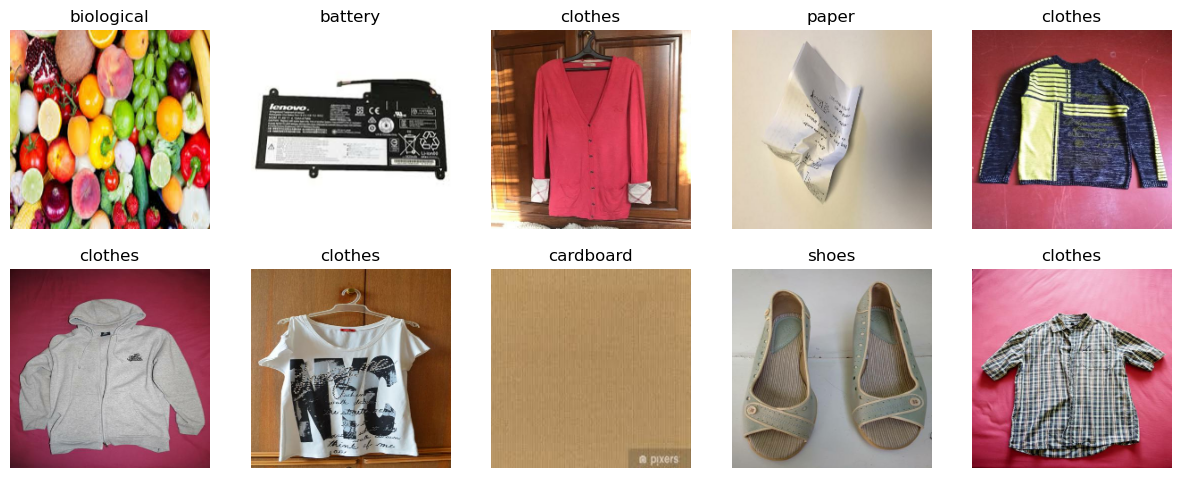

2025-01-21 14:16:26.001802: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
#displaying atleast 10 images after preprocessing and after auto tuning
import matplotlib.pyplot as plt
for images, labels in test_dataset.take(1):
    plt.figure(figsize=(15, 15))
    for i in range(min(10, len(images))):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
    plt.show()


In [39]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [41]:
# Class Weights
class_weight_dict = {0: 1.3678350970017636, 1: 1.312288494077834, 2: 2.13213058419244, 
                     3: 1.4523642322097379, 4: 0.24274256651017215, 5: 2.0558316766070246, 
                     6: 1.6814363143631437, 7: 1.2310515873015873, 8: 1.494340077071291, 
                     9: 0.6540691545435379, 10: 1.856523040095751, 11: 1.6678763440860216}
print("Class Weights:", class_weight_dict)

Class Weights: {0: 1.3678350970017636, 1: 1.312288494077834, 2: 2.13213058419244, 3: 1.4523642322097379, 4: 0.24274256651017215, 5: 2.0558316766070246, 6: 1.6814363143631437, 7: 1.2310515873015873, 8: 1.494340077071291, 9: 0.6540691545435379, 10: 1.856523040095751, 11: 1.6678763440860216}


In [43]:
#Using lighter version mibilenetv2
from tensorflow.keras.applications import EfficientNetB0
# Load EfficientNetB0 with pre-trained ImageNet weights, excluding the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [45]:
base_model.trainable = False  # Freeze base model layers

In [47]:
model = tf.keras.Sequential([
    base_model,
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Flatten(),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(len(class_names), activation='softmax')
])


In [49]:
#Gradually reduce the learning rate during training
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.build(input_shape=(BATCH_SIZE, IMG_HEIGHT, IMG_WIDTH, 3))  # Batch size can be None

In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 7, 7, 1280)     │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,391,855 (16.75 MB)

 Trainable params: 336,652 (1.28 MB)

 Non-trainable params: 4,055,203 (15.47 MB)

In [55]:
os.makedirs('modes_efficientnet')

In [57]:
# Checkpoint highest accuracy
checkpoint_high_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{'modes_efficientnet'}/base_model_highest_accuracy.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

# Checkpoint lowest loss
checkpoint_low_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{'modes_efficientnet'}/base_model_lowest_loss.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

In [63]:
import time
start_time = time.time()
print('Start Time = ', start_time)
history = model.fit(train_dataset, 
                    epochs=50, 
                    validation_data=test_dataset, 
                    callbacks=[checkpoint_high_acc, checkpoint_low_loss, early_stopping],
                   class_weight=class_weight_dict)
end_time = time.time()
print('End Time =', end_time)

Start Time =  1737449319.158582
Epoch 1/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.0850 - loss: 6.4871
Epoch 1: val_accuracy improved from -inf to 0.04668, saving model to modes_efficientnet/base_model_highest_accuracy.keras

Epoch 1: val_loss improved from inf to 3.77738, saving model to modes_efficientnet/base_model_lowest_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 135s 335ms/step - accuracy: 0.0850 - loss: 6.4846 - val_accuracy: 0.0467 - val_loss: 3.7774
Epoch 2/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.0819 - loss: 3.7321
Epoch 2: val_accuracy improved from 0.04668 to 0.06149, saving model to modes_efficientnet/base_model_highest_accuracy.keras

Epoch 2: val_loss improved from 3.77738 to 3.04410, saving model to modes_efficientnet/base_model_lowest_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 145s 375ms/step - accuracy: 0.0819 - loss: 3.7315 - val_accuracy: 0.0615 - val_loss: 3.0441
Epoch 3/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.0904 

In [65]:
print('Computational Time =', (end_time - start_time)/60, 'minutes')

Computational Time = 50.9357990304629 minutes


In [67]:
import matplotlib.pyplot as plt

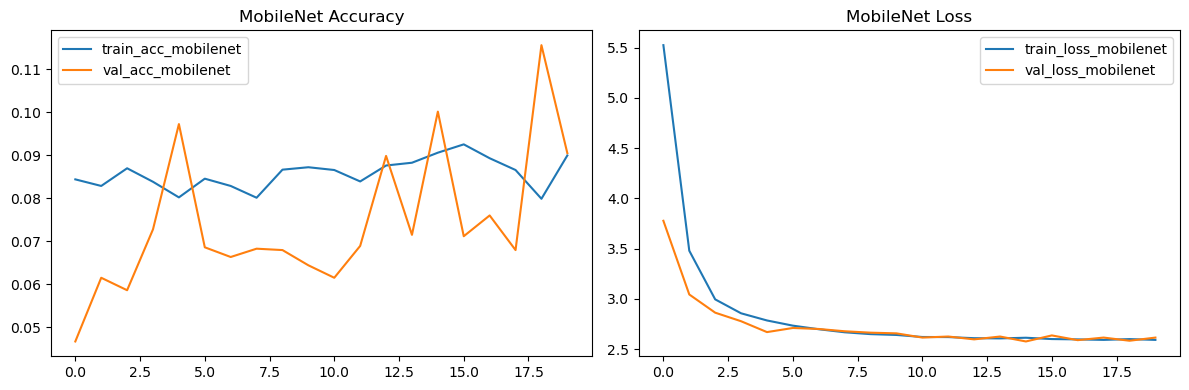

In [69]:
train_acc_mobilenet = history.history["accuracy"]
val_acc_mobilenet = history.history["val_accuracy"]
train_loss_mobilenet = history.history["loss"]
val_loss_mobilenet = history.history["val_loss"]

fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(train_acc_mobilenet, label="train_acc_mobilenet")
axs[0].plot(val_acc_mobilenet, label="val_acc_mobilenet")
axs[0].set_title("MobileNet Accuracy")
axs[0].legend()

axs[1].plot(train_loss_mobilenet, label="train_loss_mobilenet")
axs[1].plot(val_loss_mobilenet, label="val_loss_mobilenet")
axs[1].set_title("MobileNet Loss")
axs[1].legend()

plt.tight_layout()
plt.show()

In [71]:
model.save('efficientnet_classweights_model.h5')

In [73]:
model.save('efficientnet_classweights_model.keras')

In [77]:
import time
start_time = time.time()
print('Start Time = ', start_time)
history = model.fit(train_dataset, 
                    epochs=50, 
                    validation_data=test_dataset, 
                    callbacks=[checkpoint_high_acc, checkpoint_low_loss, early_stopping])
end_time = time.time()
print('End Time =', end_time)

Start Time =  1737455253.71975
Epoch 1/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.2712 - loss: 2.4389
Epoch 1: val_accuracy improved from 0.11558 to 0.34288, saving model to modes_efficientnet/base_model_highest_accuracy.keras

Epoch 1: val_loss improved from 2.57657 to 2.29158, saving model to modes_efficientnet/base_model_lowest_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 156s 398ms/step - accuracy: 0.2713 - loss: 2.4388 - val_accuracy: 0.3429 - val_loss: 2.2916
Epoch 2/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.3375 - loss: 2.3080
Epoch 2: val_accuracy did not improve from 0.34288

Epoch 2: val_loss improved from 2.29158 to 2.28280, saving model to modes_efficientnet/base_model_lowest_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 157s 403ms/step - accuracy: 0.3375 - loss: 2.3080 - val_accuracy: 0.3429 - val_loss: 2.2828
Epoch 3/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.3465 - loss: 2.2867
Epoch 3: val_accuracy did not improve from 0.34288

E

In [79]:
print('Computational Time =', (end_time - start_time)/60, 'minutes')

Computational Time = 95.1102762023608 minutes


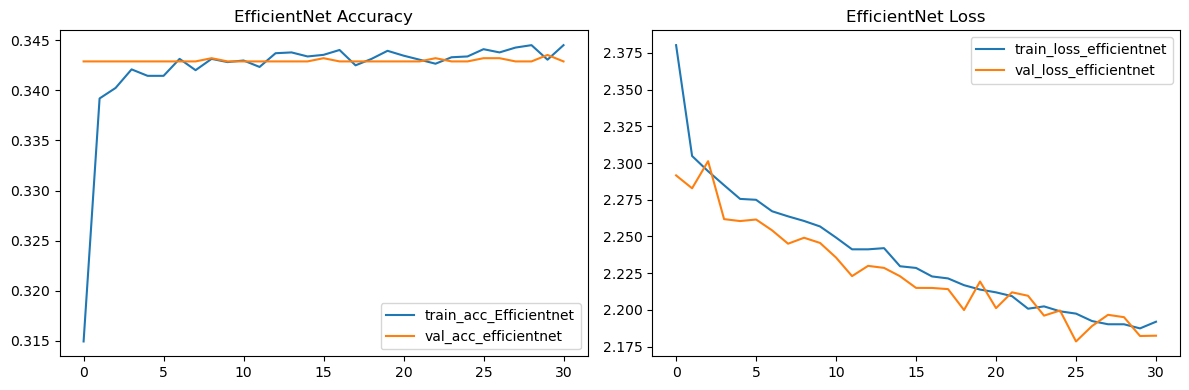

In [85]:
train_acc_mobilenet = history.history["accuracy"]
val_acc_mobilenet = history.history["val_accuracy"]
train_loss_mobilenet = history.history["loss"]
val_loss_mobilenet = history.history["val_loss"]

fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(train_acc_mobilenet, label="train_acc_Efficientnet")
axs[0].plot(val_acc_mobilenet, label="val_acc_efficientnet")
axs[0].set_title("EfficientNet Accuracy")
axs[0].legend()

axs[1].plot(train_loss_mobilenet, label="train_loss_efficientnet")
axs[1].plot(val_loss_mobilenet, label="val_loss_efficientnet")
axs[1].set_title("EfficientNet Loss")
axs[1].legend()

plt.tight_layout()
plt.show()

In [87]:
model.save('EfficientNet_withoutweights.h5')

In [89]:
model.save('EfficientNet_withoutweights.keras')

In [97]:
test_df = pd.DataFrame(columns=['filename','class'])
for i in os.listdir('dataset/test'):
    filepath='dataset/test/'+i
    for j in os.listdir(filepath):
        imagepath = filepath + '/' + j
        test_data = pd.DataFrame({'filename':imagepath, 'class':[i]})
        test_df = pd.concat([test_df,test_data], ignore_index=True)
test_df

,filename,class
0,dataset/test/paper/paper283.jpg,paper
1,dataset/test/paper/paper526.jpg,paper
2,dataset/test/paper/paper485.jpg,paper
3,dataset/test/paper/paper452.jpg,paper
4,dataset/test/paper/paper320.jpg,paper
...,...,...
3101,dataset/test/shoes/shoes1428.jpg,shoes
3102,dataset/test/shoes/shoes32.jpg,shoes
3103,dataset/test/shoes/shoes254.jpg,shoes
3104,dataset/test/shoes/shoes240.jpg,shoes


In [107]:
import numpy as np

In [117]:
images = np.array([load_and_preprocess_image(file) for file in test_df['filename']])

NameError: name 'load_and_preprocess_image' is not defined

In [115]:
model.predict((np.array(test_df['filename'])))

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1/Cast:0", shape=(32,), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=string)
  • training=False
  • mask=None